#<font color=' #b6c121'>Analyzing physically forcing people to have sexual intercourse:</font>


Here in this project I have taken sexual assault as the topic. Sexual assault is the physical invasion of the body resulting in injury. There is no wrong or right way in doing these things as this may change a student's behavior, physical responses, and creates emotional imbalances which may appear and disappear and may reappear.

Each student who survive after this act may feel shame, guilt, anxiety, depression, mood swings, panic attacks and in turn may lead to serious issue of attempting suicide. when we dive deeper some of the possible causes are among the students who are being exposed to alcohol and drugs. So in this project I am analyzing the possible causes and impacts behind them with the provided data.



Note: We can collect the required data from Centers for Disease Control and Prevention website.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from functools import reduce

In [3]:
# Reading the data: Here I have uploaded the data set from the website as per my requirements for further analysis:
yrbs_data = pd.read_csv('/content/drive/My Drive/Python/yrbss_districts_2019.csv')

In [4]:
yrbs_data.drop(yrbs_data.columns.difference(['sitecode','sitename','year','age','sex','grade','q19','q25','q28','q29','q44','qalcoholschool','qmarijuanaschool','qcurrentcocaine','qhallucdrug','qtaughtHIV','qtaughtsexed']), 1, inplace=True)

<ipython-input-4-f591ef32f49e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  yrbs_data.drop(yrbs_data.columns.difference(['sitecode','sitename','year','age','sex','grade','q19','q25','q28','q29','q44','qalcoholschool','qmarijuanaschool','qcurrentcocaine','qhallucdrug','qtaughtHIV','qtaughtsexed']), 1, inplace=True)


In [5]:
# Renaming my variables as per user understanding:
yrbs_data.rename(columns={'q19': 'Physically_forced', 'q25': 'Sad_or_hopeless', 'q28': 'Attempted_suicide', 'q29': 'Injurious_suicide_attempt','q44': 'Source_of_alcohol'}, inplace=True)


In [6]:
# Dropping the index values:
yrbs_data = yrbs_data.reset_index(drop=True)

In [7]:
# Replacing Nan values to Zero:
pd.set_option('display.max_columns', None)
yrbs_d = yrbs_data.replace(np.nan,0)

In [8]:
yrbs_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504249 entries, 0 to 504248
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sitecode                   504249 non-null  object 
 1   sitename                   504249 non-null  object 
 2   year                       504249 non-null  int64  
 3   age                        504249 non-null  float64
 4   sex                        504249 non-null  float64
 5   grade                      504249 non-null  float64
 6   Physically_forced          504249 non-null  float64
 7   Sad_or_hopeless            504249 non-null  float64
 8   Attempted_suicide          504249 non-null  float64
 9   Injurious_suicide_attempt  504249 non-null  float64
 10  Source_of_alcohol          504249 non-null  float64
 11  qalcoholschool             504249 non-null  float64
 12  qmarijuanaschool           504249 non-null  float64
 13  qcurrentcocaine            50

In [9]:
# Identifying sum of null values:
yrbs_d.isnull().sum()

sitecode                     0
sitename                     0
year                         0
age                          0
sex                          0
grade                        0
Physically_forced            0
Sad_or_hopeless              0
Attempted_suicide            0
Injurious_suicide_attempt    0
Source_of_alcohol            0
qalcoholschool               0
qmarijuanaschool             0
qcurrentcocaine              0
qhallucdrug                  0
qtaughtHIV                   0
qtaughtsexed                 0
dtype: int64

In [10]:
yrbs_d.head()

,sitecode,sitename,year,age,sex,grade,Physically_forced,Sad_or_hopeless,Attempted_suicide,Injurious_suicide_attempt,Source_of_alcohol,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qhallucdrug,qtaughtHIV,qtaughtsexed
0,CH,"Chicago, IL (CH)",1991,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,CH,"Chicago, IL (CH)",1991,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,CH,"Chicago, IL (CH)",1991,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,CH,"Chicago, IL (CH)",1991,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,CH,"Chicago, IL (CH)",1991,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<Axes: xlabel='Physically_forced', ylabel='year'>

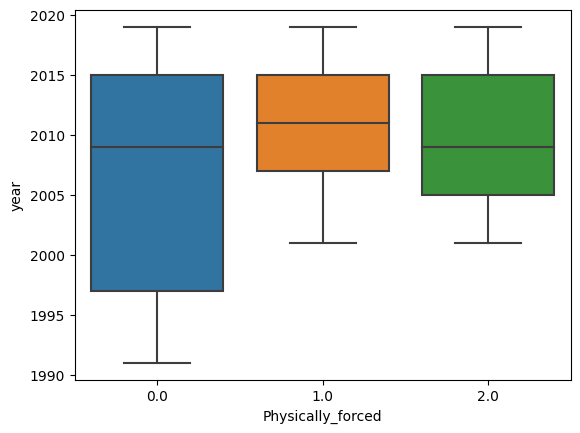

In [11]:
# To identify people who have said 'yes' - 1.0 to Physically_forced to have sexual assault.
sns.boxplot(x="Physically_forced", y="year", data=yrbs_d)

Initially I am starting with year count:

On checking the map, I have an idea that many people responded yes to **Physically_forced - Have you ever been physically forced to have sexual intercourse when you did not want to? ** and the lower quartile range starts from 2007 to the upper quartile range of 2015 and the line touches upto 2019.

Hence I will be planning to take that year data alone for the upcoming analysis.

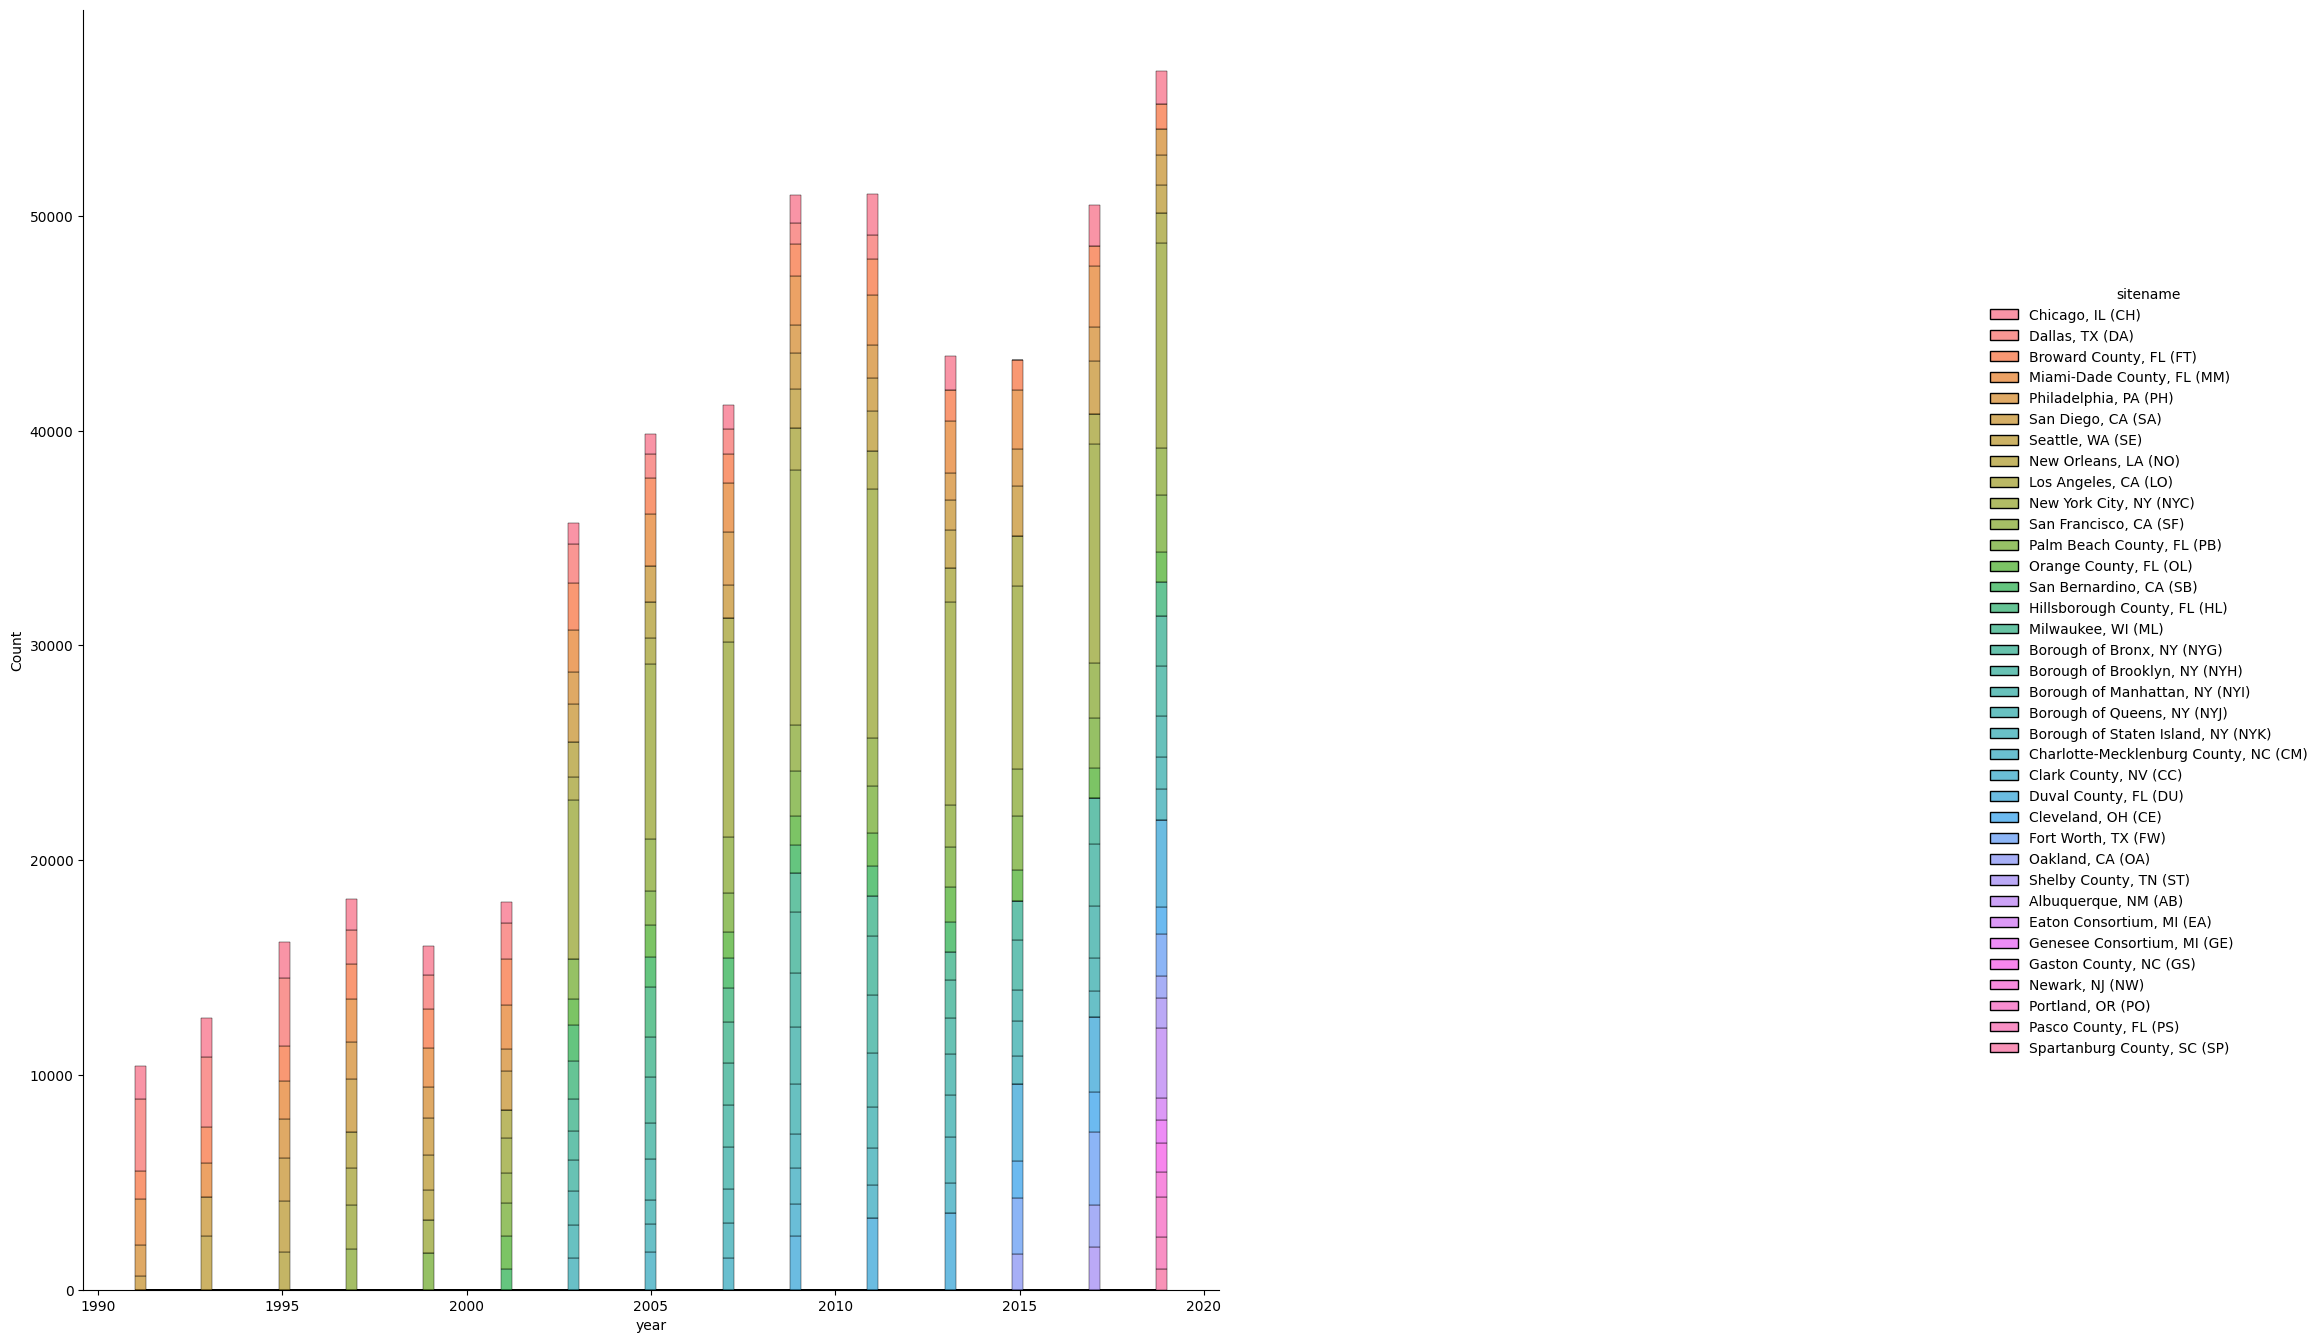

In [12]:
plot = sns.displot(data = yrbs_d, x = 'year', hue ='sitename', multiple = 'stack')
plot.fig.set_size_inches(25,15)
#This distribution plot also shows the year range.

When the year passes by, we can take the survey data more seriously, and from this graph, we can also see that more people are being participated in this survey.


In [13]:
#I have categorized the data based in the year survey
required_year=(yrbs_d.loc[yrbs_d['year'].isin([2007,2009,2011,2013,2015,2017,2019])])
required_year

,sitecode,sitename,year,age,sex,grade,Physically_forced,Sad_or_hopeless,Attempted_suicide,Injurious_suicide_attempt,Source_of_alcohol,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qhallucdrug,qtaughtHIV,qtaughtsexed
167046,CH,"Chicago, IL (CH)",2007,3.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0
167047,CH,"Chicago, IL (CH)",2007,4.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
167048,CH,"Chicago, IL (CH)",2007,4.0,0.0,1.0,2.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
167049,CH,"Chicago, IL (CH)",2007,0.0,2.0,1.0,2.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,0.0,1.0,0.0
167050,CH,"Chicago, IL (CH)",2007,0.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504244,ST,"Shelby County, TN (ST)",2019,7.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
504245,ST,"Shelby County, TN (ST)",2019,7.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504246,ST,"Shelby County, TN (ST)",2019,7.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
504247,ST,"Shelby County, TN (ST)",2019,7.0,1.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Once the categorization is done, to deep dive I have a question in my mind. They are,
1. Reasons due to alcohol or drug?

I am taking indiviual % of people who responded 'Yes' to Physically_forced and using their count and % for further analysis.

In [14]:
required_year['Physically_forced'].value_counts()

2.0    225056
0.0     91155
1.0     20992
Name: Physically_forced, dtype: int64

In [15]:
required_year['qalcoholschool'].value_counts()

0.0    221797
1.0    108135
2.0      4303
3.0      1212
7.0       716
4.0       573
5.0       319
6.0       148
Name: qalcoholschool, dtype: int64

As of now, the 'yes' response rate is 20992 out of 337203 which is of 6.22%. This is an over all count, but I have been decided to find the trends among city.

Hence, I am splitting my data with dummy variables so that I can use them as much as possible.

In my next analysis, I am going to use the data among various districts using sum of 'yes' values, count of total Physically_forced values and correlation using heatmap.


In [16]:
#Total count of Physically_forced variable with respect to various cities using pivot table. Iam using this table as denominator to find % value:
yeartable = pd.pivot_table(required_year, values='Physically_forced',index=['year'], columns=['sitename'], aggfunc = 'count')
yt_data = yeartable.reset_index()
denominator = yt_data.fillna(0)
denominator

sitename,year,"Albuquerque, NM (AB)","Borough of Bronx, NY (NYG)","Borough of Brooklyn, NY (NYH)","Borough of Manhattan, NY (NYI)","Borough of Queens, NY (NYJ)","Borough of Staten Island, NY (NYK)","Broward County, FL (FT)","Charlotte-Mecklenburg County, NC (CM)","Chicago, IL (CH)","Clark County, NV (CC)","Cleveland, OH (CE)","Dallas, TX (DA)","Duval County, FL (DU)","Eaton Consortium, MI (EA)","Fort Worth, TX (FW)","Gaston County, NC (GS)","Genesee Consortium, MI (GE)","Hillsborough County, FL (HL)","Los Angeles, CA (LO)","Miami-Dade County, FL (MM)","Milwaukee, WI (ML)","New York City, NY (NYC)","Newark, NJ (NW)","Oakland, CA (OA)","Orange County, FL (OL)","Palm Beach County, FL (PB)","Pasco County, FL (PS)","Philadelphia, PA (PH)","Portland, OR (PO)","San Bernardino, CA (SB)","San Diego, CA (SA)","San Francisco, CA (SF)","Seattle, WA (SE)","Shelby County, TN (ST)","Spartanburg County, SC (SP)"
0,2007,0.0,1960.0,1980.0,1936.0,1573.0,1631.0,1347.0,1484.0,1118.0,0.0,0.0,1134.0,0.0,0.0,0.0,0.0,0.0,1606.0,1118.0,2305.0,1892.0,9080.0,0.0,0.0,1226.0,1839.0,0.0,2450.0,0.0,1365.0,1542.0,2587.0,0.0,0.0,0.0
1,2009,0.0,2833.0,2530.0,2647.0,2311.0,1566.0,1526.0,1713.0,1292.0,1461.0,0.0,965.0,2513.0,0.0,0.0,0.0,0.0,0.0,1927.0,2256.0,1841.0,11887.0,0.0,0.0,1339.0,2087.0,0.0,1328.0,0.0,1300.0,1667.0,2154.0,1821.0,0.0,0.0
2,2011,0.0,2723.0,2713.0,2524.0,1893.0,1717.0,1681.0,1555.0,1907.0,0.0,0.0,1152.0,3336.0,0.0,0.0,0.0,0.0,0.0,1767.0,2302.0,1862.0,11570.0,0.0,0.0,1524.0,2198.0,0.0,1539.0,0.0,1430.0,1529.0,2220.0,1896.0,0.0,0.0
3,2013,0.0,1739.0,1686.0,1928.0,1929.0,2157.0,1443.0,1417.0,1581.0,0.0,0.0,0.0,3558.0,0.0,0.0,0.0,0.0,0.0,1619.0,2426.0,1308.0,9439.0,0.0,0.0,1658.0,1836.0,0.0,1280.0,0.0,1395.0,1357.0,1953.0,1773.0,0.0,0.0
4,2015,0.0,1804.0,2337.0,1461.0,1603.0,1317.0,1413.0,0.0,0.0,0.0,1705.0,0.0,3608.0,0.0,2604.0,0.0,0.0,0.0,2336.0,2728.0,0.0,8522.0,0.0,1669.0,1458.0,2490.0,0.0,1717.0,0.0,0.0,2333.0,2181.0,0.0,0.0,0.0
5,2017,0.0,2148.0,2890.0,2396.0,1544.0,1213.0,938.0,0.0,1883.0,0.0,1860.0,0.0,3493.0,0.0,3380.0,0.0,0.0,0.0,1409.0,2863.0,0.0,10191.0,0.0,1971.0,1386.0,2353.0,0.0,1585.0,0.0,0.0,2452.0,2544.0,0.0,1991.0,0.0
6,2019,3216.0,2363.0,2289.0,1924.0,1510.0,1448.0,1178.0,0.0,1562.0,0.0,1241.0,0.0,4032.0,1058.0,1992.0,1339.0,1077.0,1552.0,1405.0,0.0,0.0,9534.0,1171.0,1013.0,1429.0,2652.0,1498.0,1217.0,1837.0,0.0,1388.0,2169.0,1296.0,1410.0,970.0


In [17]:
#dummy variables to splitup
denominator_copy = required_year.copy()
yes_resp_data = pd.get_dummies(denominator_copy, columns = ['Physically_forced', 'Injurious_suicide_attempt']).reset_index()
yes_resp_data.head()

,index,sitecode,sitename,year,age,sex,grade,Sad_or_hopeless,Attempted_suicide,Source_of_alcohol,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qhallucdrug,qtaughtHIV,qtaughtsexed,Physically_forced_0.0,Physically_forced_1.0,Physically_forced_2.0,Injurious_suicide_attempt_0.0,Injurious_suicide_attempt_1.0,Injurious_suicide_attempt_2.0,Injurious_suicide_attempt_3.0
0,167046,CH,"Chicago, IL (CH)",2007,3.0,0.0,3.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0,0,0,1,1,0,0,0
1,167047,CH,"Chicago, IL (CH)",2007,4.0,0.0,0.0,0.0,3.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0
2,167048,CH,"Chicago, IL (CH)",2007,4.0,0.0,1.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,167049,CH,"Chicago, IL (CH)",2007,0.0,2.0,1.0,2.0,1.0,6.0,1.0,1.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0,0
4,167050,CH,"Chicago, IL (CH)",2007,0.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0,0,1,0,1,0,0


In [18]:
#Iam calculating the numerator for finding the specific 'yes' %:
ydata = pd.pivot_table(yes_resp_data, values='Physically_forced_1.0',index=['year'], columns=['sitename'], aggfunc = np.sum)
yearone_data = ydata.reset_index()
numerator = yearone_data.fillna(0)
numerator

sitename,year,"Albuquerque, NM (AB)","Borough of Bronx, NY (NYG)","Borough of Brooklyn, NY (NYH)","Borough of Manhattan, NY (NYI)","Borough of Queens, NY (NYJ)","Borough of Staten Island, NY (NYK)","Broward County, FL (FT)","Charlotte-Mecklenburg County, NC (CM)","Chicago, IL (CH)","Clark County, NV (CC)","Cleveland, OH (CE)","Dallas, TX (DA)","Duval County, FL (DU)","Eaton Consortium, MI (EA)","Fort Worth, TX (FW)","Gaston County, NC (GS)","Genesee Consortium, MI (GE)","Hillsborough County, FL (HL)","Los Angeles, CA (LO)","Miami-Dade County, FL (MM)","Milwaukee, WI (ML)","New York City, NY (NYC)","Newark, NJ (NW)","Oakland, CA (OA)","Orange County, FL (OL)","Palm Beach County, FL (PB)","Pasco County, FL (PS)","Philadelphia, PA (PH)","Portland, OR (PO)","San Bernardino, CA (SB)","San Diego, CA (SA)","San Francisco, CA (SF)","Seattle, WA (SE)","Shelby County, TN (ST)","Spartanburg County, SC (SP)"
0,2007,0.0,150.0,173.0,155.0,112.0,116.0,105.0,108.0,119.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,185.0,58.0,156.0,0.0,706.0,0.0,0.0,112.0,142.0,0.0,232.0,0.0,88.0,137.0,171.0,0.0,0.0,0.0
1,2009,0.0,216.0,201.0,199.0,172.0,112.0,114.0,137.0,120.0,147.0,0.0,89.0,312.0,0.0,0.0,0.0,0.0,0.0,152.0,184.0,0.0,900.0,0.0,0.0,92.0,179.0,0.0,163.0,0.0,99.0,115.0,118.0,152.0,0.0,0.0
2,2011,0.0,151.0,179.0,184.0,125.0,133.0,113.0,157.0,167.0,0.0,0.0,101.0,412.0,0.0,0.0,0.0,0.0,0.0,153.0,161.0,0.0,772.0,0.0,0.0,111.0,174.0,0.0,161.0,0.0,97.0,104.0,135.0,136.0,0.0,0.0
3,2013,0.0,0.0,0.0,0.0,0.0,0.0,116.0,114.0,135.0,0.0,0.0,0.0,389.0,0.0,0.0,0.0,0.0,0.0,128.0,166.0,0.0,0.0,0.0,0.0,158.0,191.0,0.0,110.0,0.0,84.0,97.0,0.0,141.0,0.0,0.0
4,2015,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,179.0,0.0,446.0,0.0,137.0,0.0,0.0,0.0,172.0,169.0,0.0,0.0,0.0,0.0,91.0,255.0,0.0,140.0,0.0,0.0,172.0,177.0,0.0,0.0,0.0
5,2017,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,148.0,0.0,187.0,0.0,413.0,0.0,296.0,0.0,0.0,0.0,93.0,272.0,0.0,0.0,0.0,221.0,114.0,221.0,0.0,125.0,0.0,0.0,172.0,192.0,0.0,240.0,0.0
6,2019,291.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,149.0,0.0,96.0,0.0,464.0,92.0,169.0,122.0,131.0,161.0,97.0,0.0,0.0,0.0,128.0,103.0,119.0,256.0,152.0,106.0,167.0,0.0,80.0,188.0,117.0,149.0,0.0


Intead of taking all districts, I am using a heatmap to find the highly affected districts between total value of Physically_forced_1.0 (YES) and various districts.



<Axes: xlabel='sitename', ylabel='sitename'>

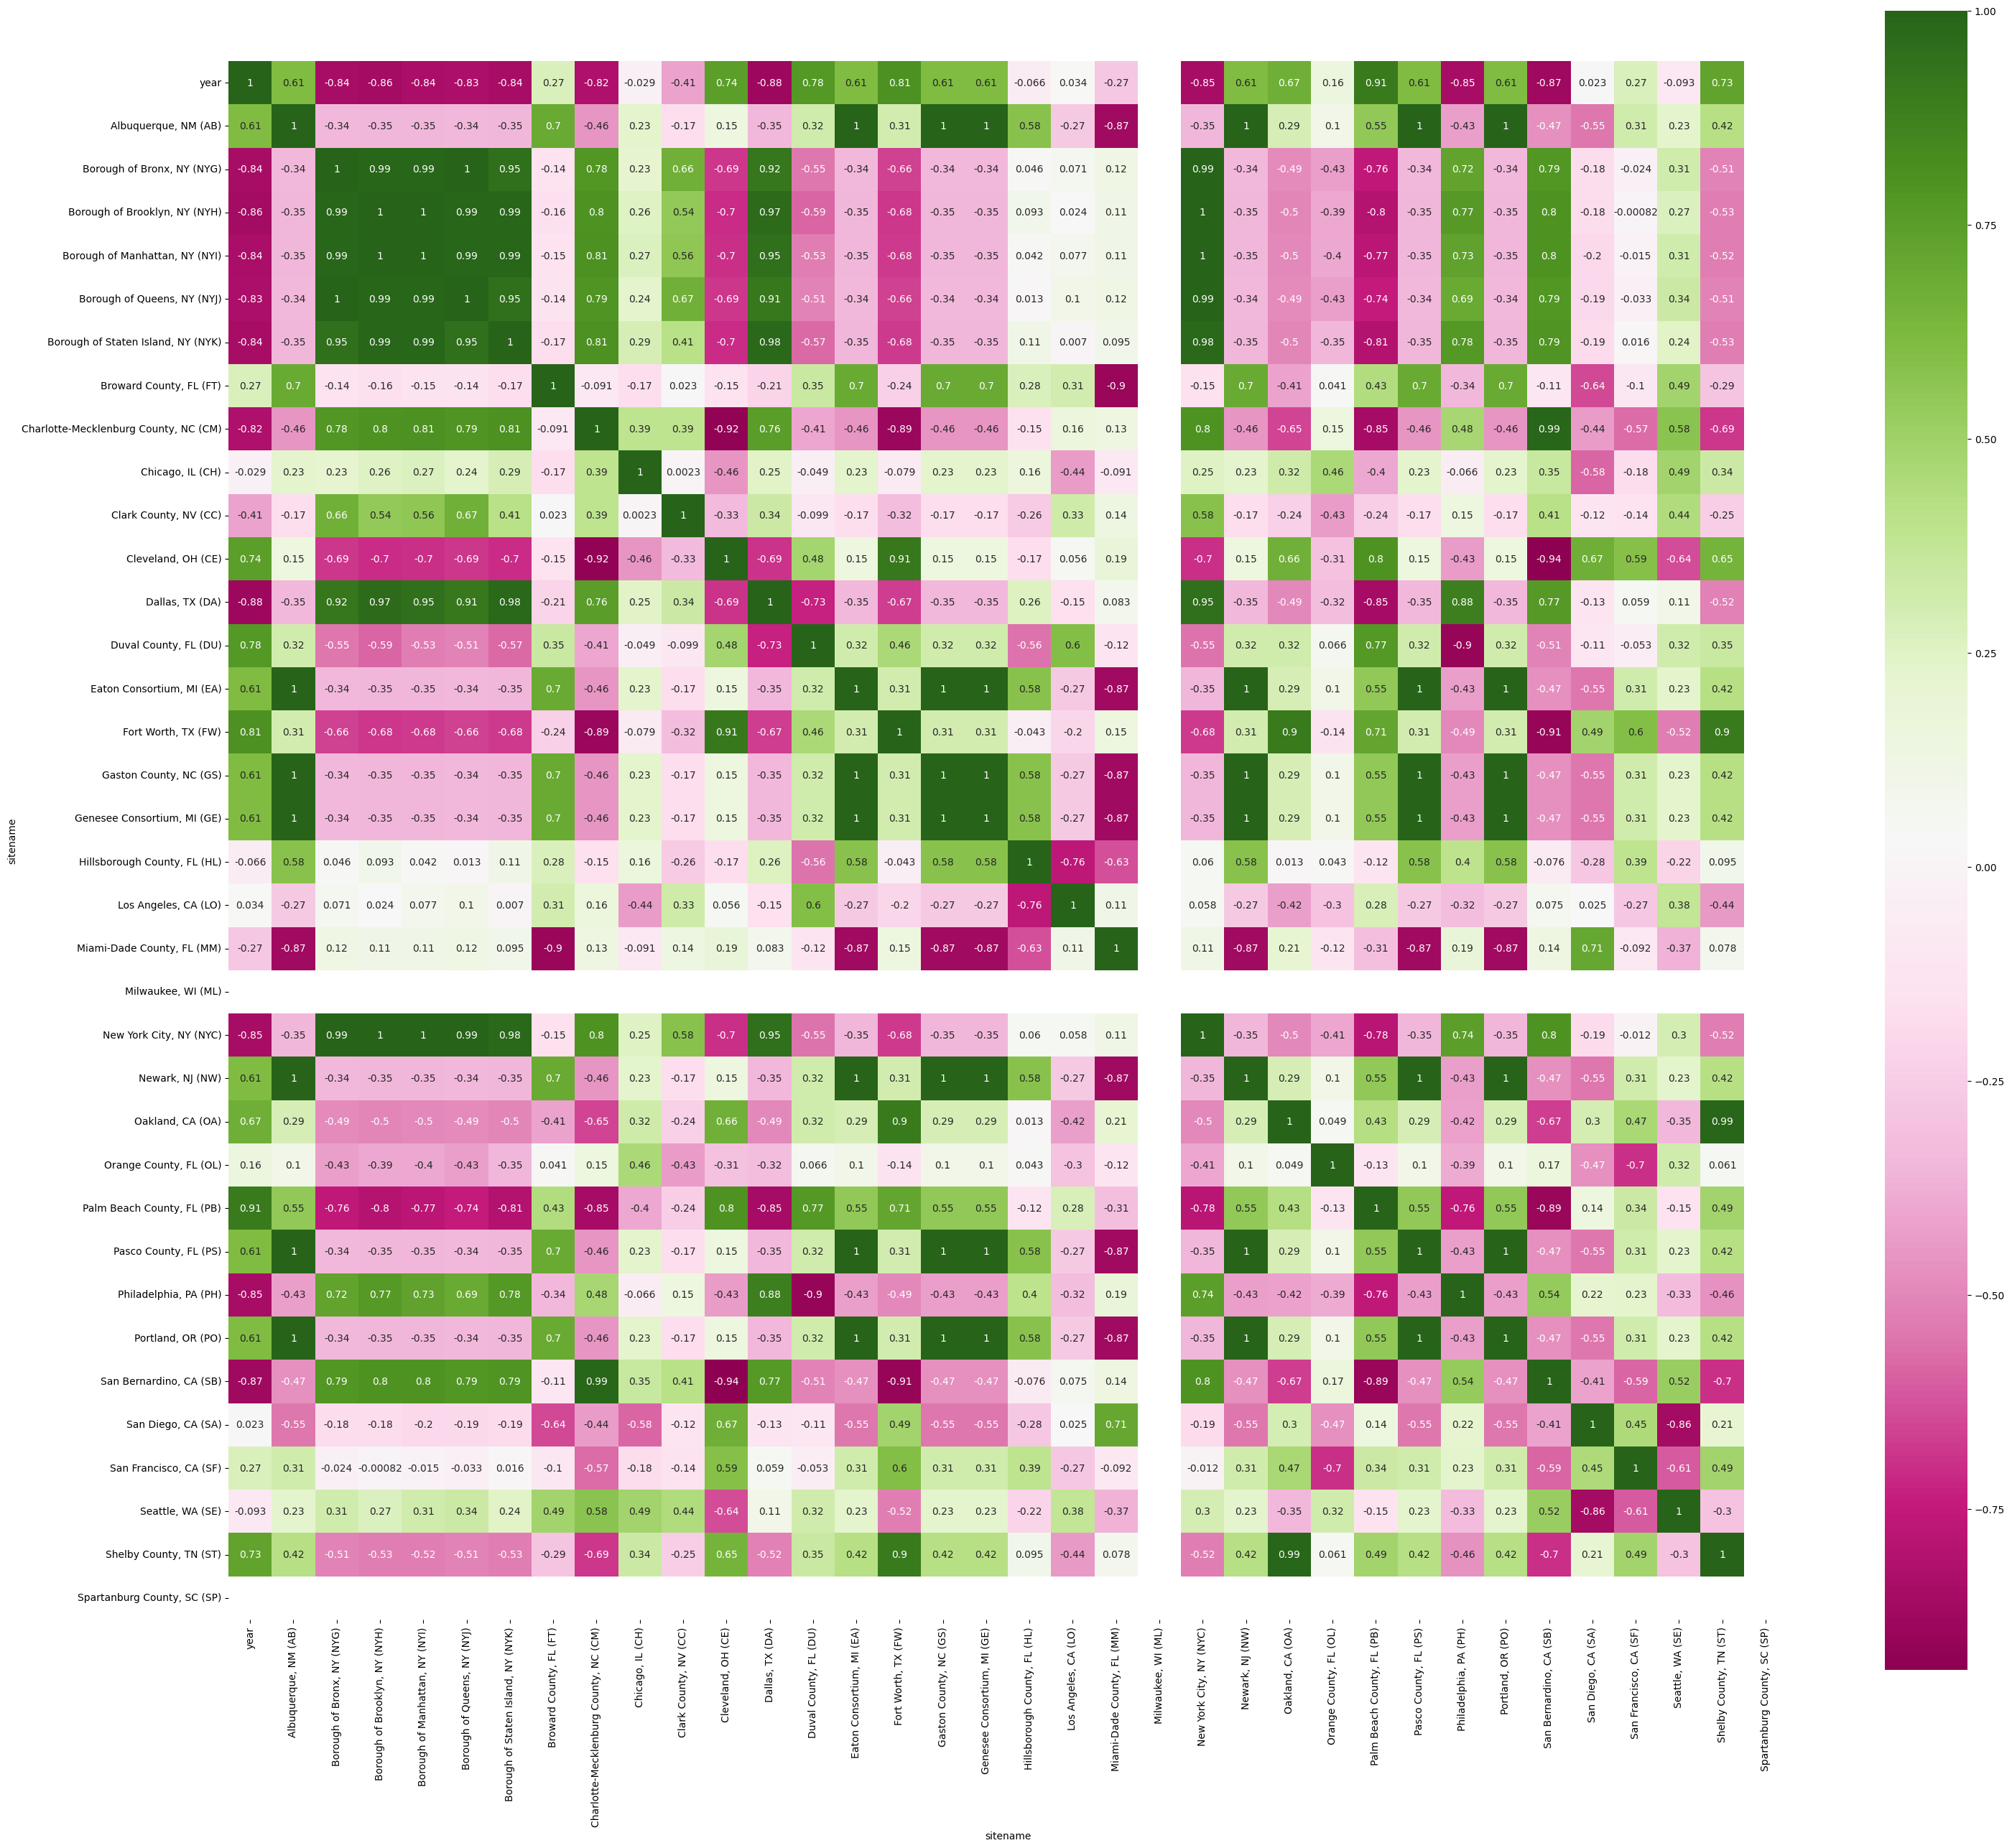

In [19]:
heat_mp1 = numerator.corr()
plt.figure(figsize = (35,30))
sns.heatmap(heat_mp1, square = True, cmap="PiYG", annot = True)

As of now I have found numerator and denominator to find actual % of people who affected in certain districts and from the heat map, I will be taking the districts which are correlated +ve ly so that I can plot the graph based on its highly prioritized value.

In [20]:
Albuquerque = numerator['Albuquerque, NM (AB)'] / denominator ['Albuquerque, NM (AB)']
Broward_County = numerator['Broward County, FL (FT)'] / denominator ['Broward County, FL (FT)']
Cleveland = numerator['Cleveland, OH (CE)'] / denominator ['Cleveland, OH (CE)']
Duval_County = numerator['Duval County, FL (DU)'] / denominator ['Duval County, FL (DU)']
Eaton_Consortium = numerator['Eaton Consortium, MI (EA)'] / denominator ['Eaton Consortium, MI (EA)']
Fort_Worth = numerator['Fort Worth, TX (FW)'] / denominator ['Fort Worth, TX (FW)']
Gaston_County = numerator['Gaston County, NC (GS)'] / denominator ['Gaston County, NC (GS)']
Genesee_Consortium = numerator['Genesee Consortium, MI (GE)'] / denominator ['Genesee Consortium, MI (GE)']
Newark = numerator['Newark, NJ (NW)'] / denominator ['Newark, NJ (NW)']
Oakland = numerator['Oakland, CA (OA)'] / denominator ['Oakland, CA (OA)']
Orange_County = numerator['Orange County, FL (OL)'] / denominator ['Orange County, FL (OL)']
Palm_Beach = numerator['Palm Beach County, FL (PB)'] / denominator ['Palm Beach County, FL (PB)']
Pasco_County = numerator['Pasco County, FL (PS)'] / denominator ['Pasco County, FL (PS)']
Portland = numerator['Portland, OR (PO)'] / denominator ['Portland, OR (PO)']
San_Francisco= numerator['San Francisco, CA (SF)'] / denominator ['San Francisco, CA (SF)']
Shelby_County= numerator['Shelby County, TN (ST)'] / denominator ['Shelby County, TN (ST)']
Dallas = numerator['Dallas, TX (DA)'] / denominator ['Dallas, TX (DA)']


In [21]:
# with the calculated value, I am converting them into a table:
var1 = [Albuquerque, Broward_County, Cleveland, Duval_County, Eaton_Consortium, Fort_Worth, Gaston_County, Genesee_Consortium, Newark, Oakland, Orange_County,Palm_Beach, Pasco_County, Portland,San_Francisco, Shelby_County, Dallas]
district_percent = pd.DataFrame(var1)
dist_percent = district_percent.fillna(0)
d_percent = dist_percent.T
d_percent

,"Albuquerque, NM (AB)","Broward County, FL (FT)","Cleveland, OH (CE)","Duval County, FL (DU)","Eaton Consortium, MI (EA)","Fort Worth, TX (FW)","Gaston County, NC (GS)","Genesee Consortium, MI (GE)","Newark, NJ (NW)","Oakland, CA (OA)","Orange County, FL (OL)","Palm Beach County, FL (PB)","Pasco County, FL (PS)","Portland, OR (PO)","San Francisco, CA (SF)","Shelby County, TN (ST)","Dallas, TX (DA)"
0,0.000000,0.077951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091354,0.077216,0.000000,0.000000,0.066100,0.000000,0.110229
1,0.000000,0.074705,0.000000,0.124154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068708,0.085769,0.000000,0.000000,0.054782,0.000000,0.092228
2,0.000000,0.067222,0.000000,0.123501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072835,0.079163,0.000000,0.000000,0.060811,0.000000,0.087674
3,0.000000,0.080388,0.000000,0.109331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095296,0.104031,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.084926,0.104985,0.123614,0.000000,0.052611,0.000000,0.000000,0.000000,0.000000,0.062414,0.102410,0.000000,0.000000,0.081155,0.000000,0.000000
5,0.000000,0.095949,0.100538,0.118236,0.000000,0.087574,0.000000,0.000000,0.000000,0.112126,0.082251,0.093923,0.000000,0.000000,0.075472,0.120542,0.000000
6,0.090485,0.114601,0.077357,0.115079,0.086957,0.084839,0.091113,0.121634,0.109308,0.101678,0.083275,0.096531,0.101469,0.090909,0.086676,0.105674,0.000000


In [22]:
#Combining years which I initially found using graph
years = [2007,2009,2011,2013,2015,2017,2019]
d_percent2 = d_percent.assign(yearstaken=years)
d_percent2


,"Albuquerque, NM (AB)","Broward County, FL (FT)","Cleveland, OH (CE)","Duval County, FL (DU)","Eaton Consortium, MI (EA)","Fort Worth, TX (FW)","Gaston County, NC (GS)","Genesee Consortium, MI (GE)","Newark, NJ (NW)","Oakland, CA (OA)","Orange County, FL (OL)","Palm Beach County, FL (PB)","Pasco County, FL (PS)","Portland, OR (PO)","San Francisco, CA (SF)","Shelby County, TN (ST)","Dallas, TX (DA)",yearstaken
0,0.000000,0.077951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091354,0.077216,0.000000,0.000000,0.066100,0.000000,0.110229,2007
1,0.000000,0.074705,0.000000,0.124154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068708,0.085769,0.000000,0.000000,0.054782,0.000000,0.092228,2009
2,0.000000,0.067222,0.000000,0.123501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072835,0.079163,0.000000,0.000000,0.060811,0.000000,0.087674,2011
3,0.000000,0.080388,0.000000,0.109331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095296,0.104031,0.000000,0.000000,0.000000,0.000000,0.000000,2013
4,0.000000,0.084926,0.104985,0.123614,0.000000,0.052611,0.000000,0.000000,0.000000,0.000000,0.062414,0.102410,0.000000,0.000000,0.081155,0.000000,0.000000,2015
5,0.000000,0.095949,0.100538,0.118236,0.000000,0.087574,0.000000,0.000000,0.000000,0.112126,0.082251,0.093923,0.000000,0.000000,0.075472,0.120542,0.000000,2017
6,0.090485,0.114601,0.077357,0.115079,0.086957,0.084839,0.091113,0.121634,0.109308,0.101678,0.083275,0.096531,0.101469,0.090909,0.086676,0.105674,0.000000,2019


###Finding Trends within higly prioritized districts

<Axes: xlabel='yearstaken', ylabel='Albuquerque, NM (AB)'>

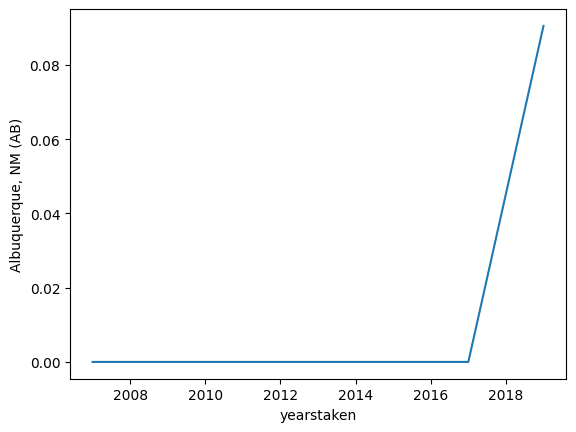

In [23]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Albuquerque, NM (AB)')

<Axes: xlabel='yearstaken', ylabel='Broward County, FL (FT)'>

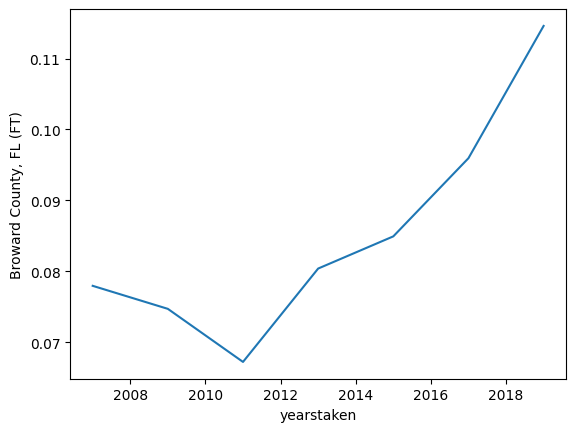

In [24]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Broward County, FL (FT)')

<Axes: xlabel='yearstaken', ylabel='Cleveland, OH (CE)'>

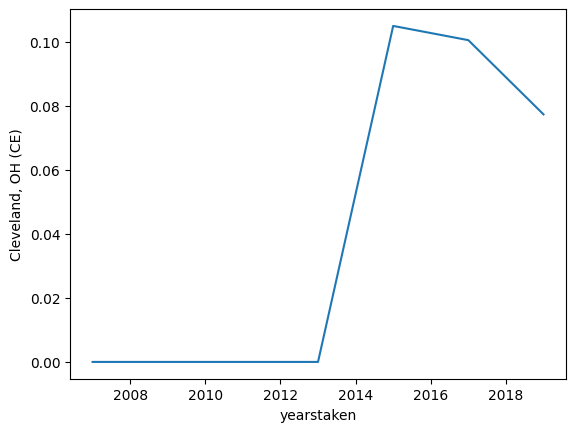

In [25]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Cleveland, OH (CE)')

<Axes: xlabel='yearstaken', ylabel='Duval County, FL (DU)'>

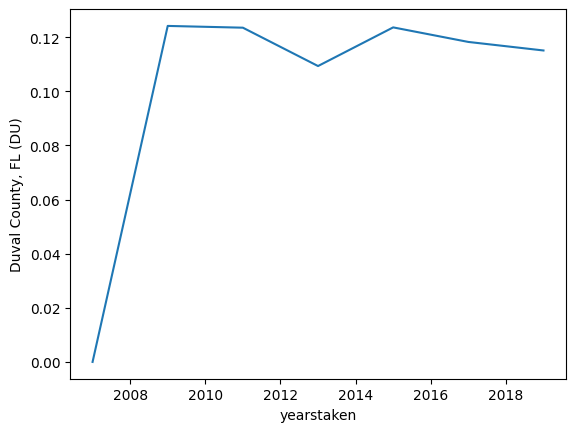

In [26]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Duval County, FL (DU)')

<Axes: xlabel='yearstaken', ylabel='Eaton Consortium, MI (EA)'>

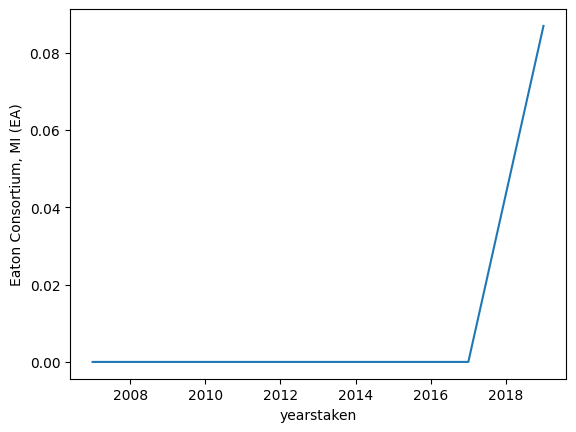

In [27]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Eaton Consortium, MI (EA)')

<Axes: xlabel='yearstaken', ylabel='Fort Worth, TX (FW)'>

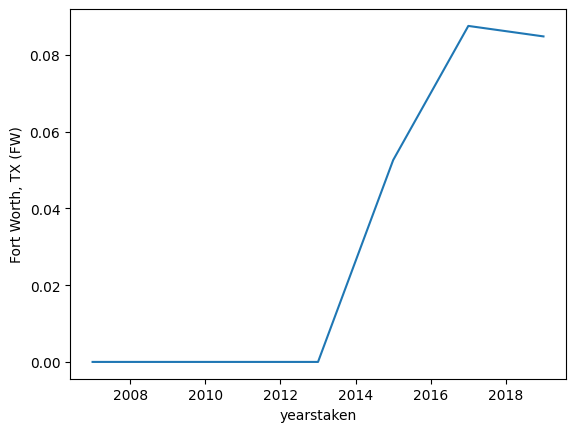

In [28]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Fort Worth, TX (FW)')

<Axes: xlabel='yearstaken', ylabel='Gaston County, NC (GS)'>

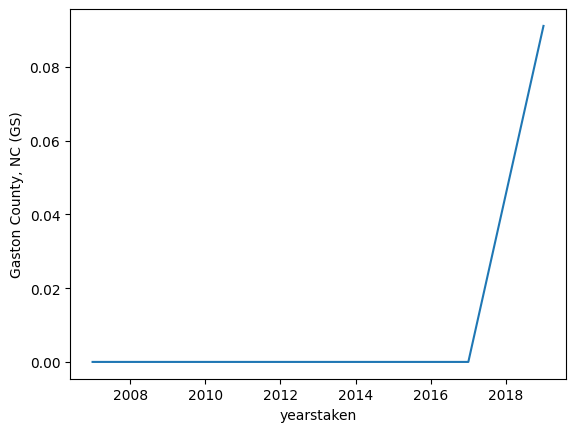

In [29]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Gaston County, NC (GS)')

<Axes: xlabel='yearstaken', ylabel='Genesee Consortium, MI (GE)'>

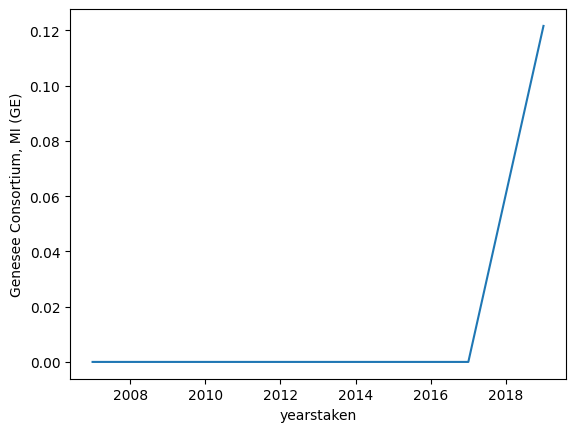

In [30]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Genesee Consortium, MI (GE)')

<Axes: xlabel='yearstaken', ylabel='Newark, NJ (NW)'>

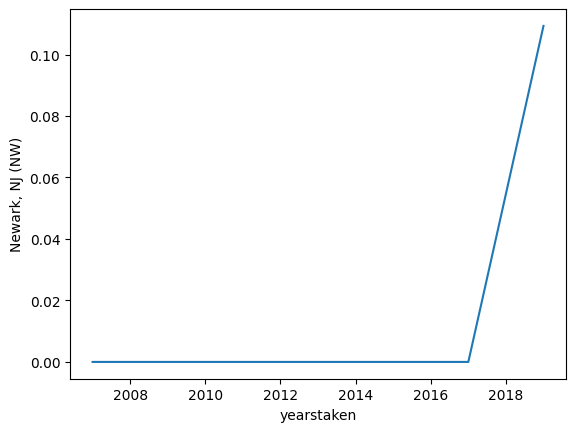

In [31]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Newark, NJ (NW)')

<Axes: xlabel='yearstaken', ylabel='Oakland, CA (OA)'>

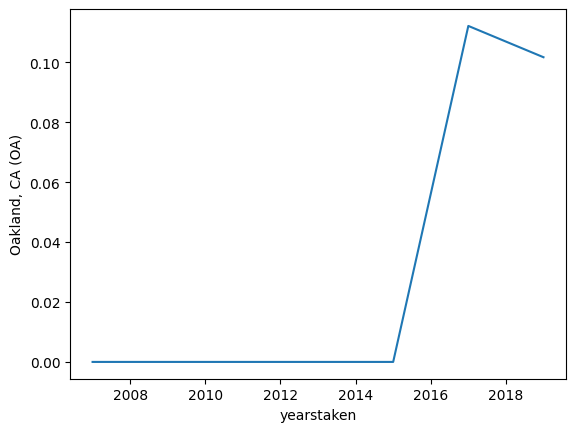

In [32]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Oakland, CA (OA)')

<Axes: xlabel='yearstaken', ylabel='Orange County, FL (OL)'>

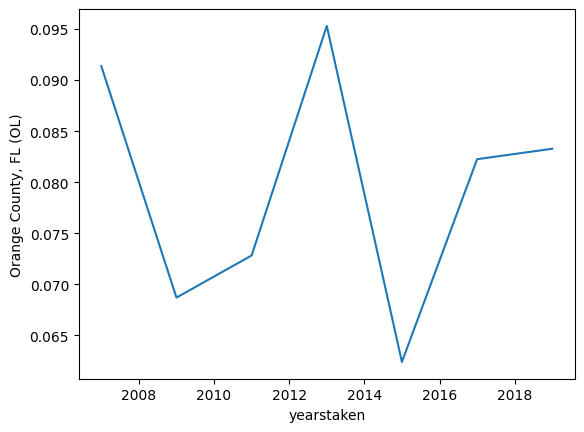

In [33]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Orange County, FL (OL)')

<Axes: xlabel='yearstaken', ylabel='Palm Beach County, FL (PB)'>

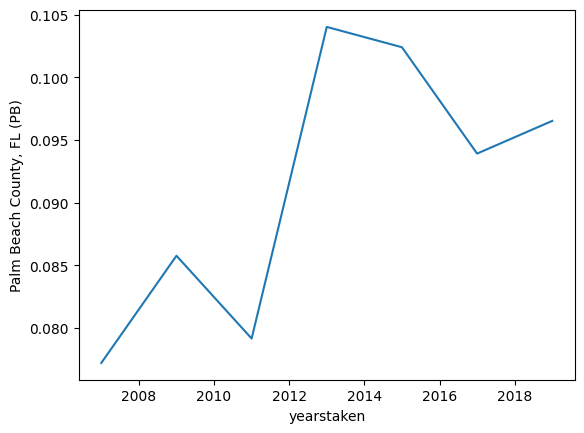

In [34]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Palm Beach County, FL (PB)')

<Axes: xlabel='yearstaken', ylabel='Pasco County, FL (PS)'>

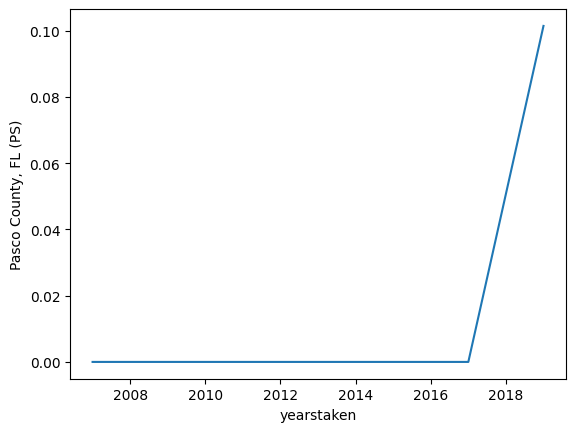

In [35]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Pasco County, FL (PS)')

<Axes: xlabel='yearstaken', ylabel='Portland, OR (PO)'>

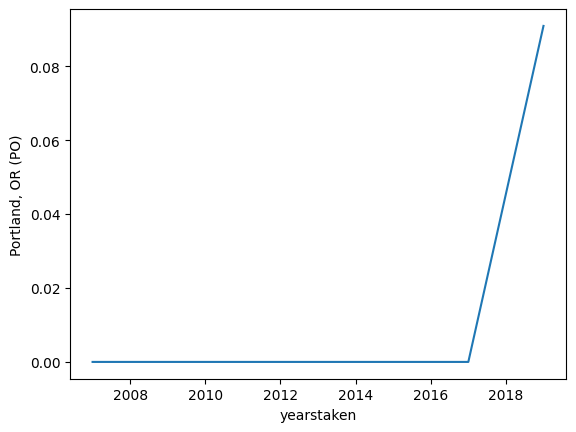

In [36]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Portland, OR (PO)')

<Axes: xlabel='yearstaken', ylabel='San Francisco, CA (SF)'>

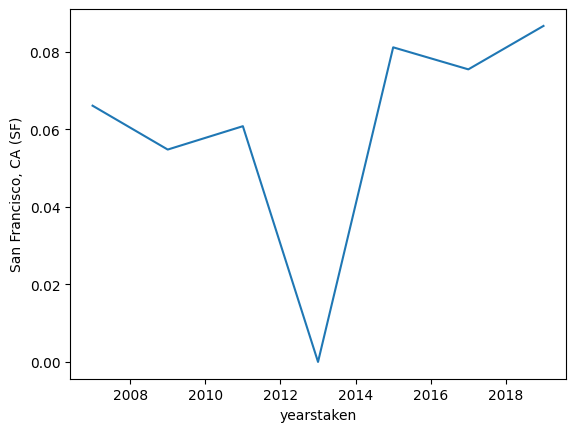

In [37]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'San Francisco, CA (SF)')

<Axes: xlabel='yearstaken', ylabel='Shelby County, TN (ST)'>

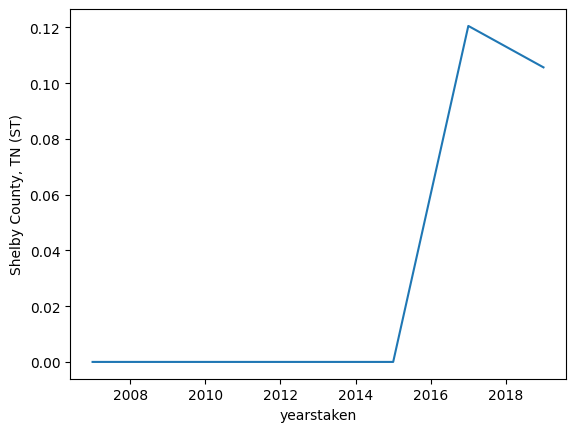

In [38]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Shelby County, TN (ST)')

<Axes: xlabel='yearstaken', ylabel='Dallas, TX (DA)'>

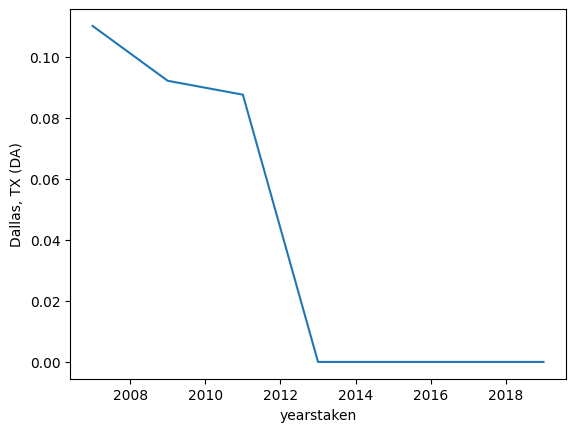

In [39]:
sns.lineplot(data=d_percent2, x = 'yearstaken', y = 'Dallas, TX (DA)')


From the those available trends I come to know that some districts like Duval county, Newark,San Fransisco, Fort Worth, Portland, Oakland are have higher % of people who has been sexually affected were as Dallas has a negative trend. The possible reason behind is that, the dallas government may created strict rules  and the same has been reflected in the graph.

If we didn't find the possible causes and the impacts behind them, serious issuses will be happening and as said 'Prevention is better than cure', preventive measures are appropriate.

Next I am going to compare the available data with various drug usage and alcohol usage within school premises, resulting in triggering up student's emotions which causes them to behave bad sexually.

##Possible causes:

I assume, possible causes for this activity is either alcohol or drug usage and I am taking datasets based on drug usage and comparing them with other variables

In [40]:
c_data = pd.concat([d_percent2, yes_resp_data], axis=0, ignore_index=True)
causes_data = c_data.fillna(0)
causes_data

,"Albuquerque, NM (AB)","Broward County, FL (FT)","Cleveland, OH (CE)","Duval County, FL (DU)","Eaton Consortium, MI (EA)","Fort Worth, TX (FW)","Gaston County, NC (GS)","Genesee Consortium, MI (GE)","Newark, NJ (NW)","Oakland, CA (OA)","Orange County, FL (OL)","Palm Beach County, FL (PB)","Pasco County, FL (PS)","Portland, OR (PO)","San Francisco, CA (SF)","Shelby County, TN (ST)","Dallas, TX (DA)",yearstaken,index,sitecode,sitename,year,age,sex,grade,Sad_or_hopeless,Attempted_suicide,Source_of_alcohol,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qhallucdrug,qtaughtHIV,qtaughtsexed,Physically_forced_0.0,Physically_forced_1.0,Physically_forced_2.0,Injurious_suicide_attempt_0.0,Injurious_suicide_attempt_1.0,Injurious_suicide_attempt_2.0,Injurious_suicide_attempt_3.0
0,0.0,0.077951,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.091354,0.077216,0.0,0.0,0.066100,0.0,0.110229,2007.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.074705,0.000000,0.124154,0.0,0.000000,0.0,0.0,0.0,0.0,0.068708,0.085769,0.0,0.0,0.054782,0.0,0.092228,2009.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.067222,0.000000,0.123501,0.0,0.000000,0.0,0.0,0.0,0.0,0.072835,0.079163,0.0,0.0,0.060811,0.0,0.087674,2011.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.080388,0.000000,0.109331,0.0,0.000000,0.0,0.0,0.0,0.0,0.095296,0.104031,0.0,0.0,0.000000,0.0,0.000000,2013.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.084926,0.104985,0.123614,0.0,0.052611,0.0,0.0,0.0,0.0,0.062414,0.102410,0.0,0.0,0.081155,0.0,0.000000,2015.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337205,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,504244.0,ST,"Shelby County, TN (ST)",2019.0,7.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
337206,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,504245.0,ST,"Shelby County, TN (ST)",2019.0,7.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
337207,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,504246.0,ST,"Shelby County, TN (ST)",2019.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
337208,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,504247.0,ST,"Shelby County, TN (ST)",2019.0,7.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


####Data comparision with 'Yes' on forced behavior and usage of alcohol on school

 qalcoholschool:

1. 0 days
2. 1 or 2 days
3. 3 to 5 days
4. 6 to 9 days
5. 10 to 19 days
6. 20 to 29 days
7. All 30 days

<Axes: xlabel='Physically_forced_1.0', ylabel='Count'>

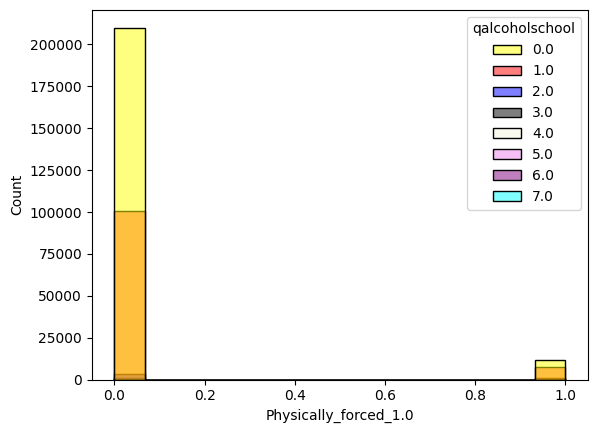

In [41]:
sns.histplot(data=causes_data,x=causes_data['Physically_forced_1.0'],palette=["yellow","red","blue","black","beige", "violet","purple","cyan"], hue=causes_data['qalcoholschool'], bins =15)

In [42]:
alcohol_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['qalcoholschool'], aggfunc=np.sum)
alcohol_table

,Physically_forced_1.0
qalcoholschool,
0.0,11717.0
1.0,7588.0
2.0,706.0
3.0,276.0
4.0,160.0
5.0,100.0
6.0,47.0
7.0,398.0


In [43]:
causes_data['qalcoholschool'].value_counts()

0.0    221804
1.0    108135
2.0      4303
3.0      1212
7.0       716
4.0       573
5.0       319
6.0       148
Name: qalcoholschool, dtype: int64

In [44]:
alcohol_table1 = alcohol_table.reset_index()
alcohol_table1

,qalcoholschool,Physically_forced_1.0
0,0.0,11717.0
1,1.0,7588.0
2,2.0,706.0
3,3.0,276.0
4,4.0,160.0
5,5.0,100.0
6,6.0,47.0
7,7.0,398.0


In [45]:
((706.0+276.0+160.0+100.0+47.0+398.0)/(4303+1212+716+573+319+148))*100

23.201760418099298

####Data comparision with 'Yes' on forced behavior and usage of marijuana on school

qmarijuanaschool:
1. 0 times
2. 1 or 2 times
3. 3 to 9 times
4. 10 to 19 times
5. 20 to 39 times
6. 40 or more times

<Axes: xlabel='Physically_forced_1.0', ylabel='Count'>

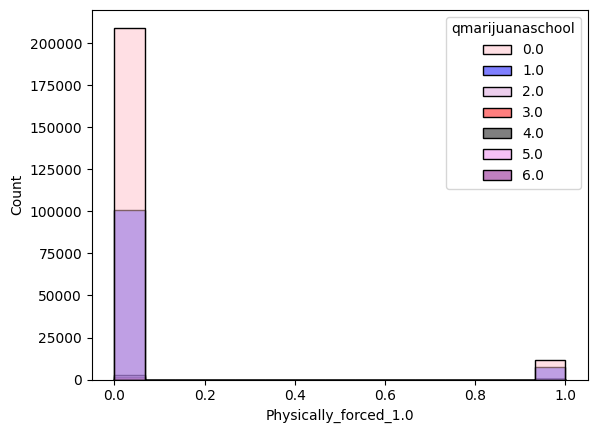

In [46]:
sns.histplot(data=causes_data,x=causes_data['Physically_forced_1.0'],palette=["pink","blue","plum","red","black","violet","purple"], hue=causes_data['qmarijuanaschool'], bins =15)

In [47]:
causes_data['qmarijuanaschool'].value_counts()

0.0    220905
1.0    108881
2.0      3415
3.0      1674
6.0      1081
4.0       829
5.0       425
Name: qmarijuanaschool, dtype: int64

In [48]:
marijuana_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['qmarijuanaschool'], aggfunc=np.sum)
marijuana_table

,Physically_forced_1.0
qmarijuanaschool,
0.0,11602.0
1.0,7766.0
2.0,528.0
3.0,302.0
4.0,213.0
5.0,102.0
6.0,479.0


In [49]:
((528.0+302.0+213.0+102.0+479.0)/(3415+1674+1081+829+425))*100

21.875

####Data comparision with 'Yes' on forced behavior and current usage of cocaine:

qcurrentcocaine:
1. 0 times
2. 1 or 2 times
3. 3 to 9 times
4. 10 to 19 times
5. 20 to 39 times
6. 40 or more times

<Axes: xlabel='Physically_forced_1.0', ylabel='Count'>

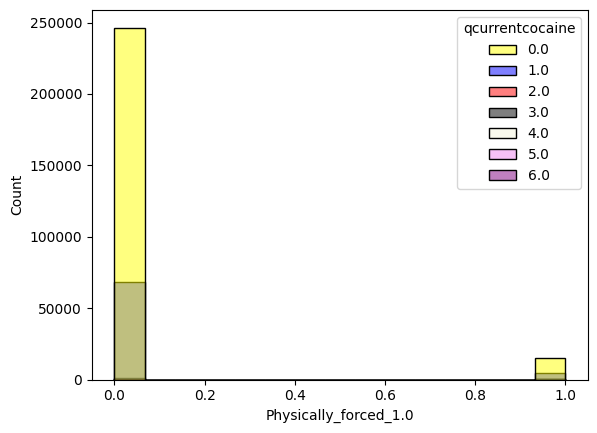

In [50]:
sns.histplot(data=causes_data,x=causes_data['Physically_forced_1.0'],palette=["yellow","blue","red","black","beige", "violet","purple"],hue=causes_data['qcurrentcocaine'], bins =15)

In [51]:
causes_data['qcurrentcocaine'].value_counts()

0.0    261701
1.0     72947
2.0      1081
6.0       573
3.0       515
4.0       266
5.0       127
Name: qcurrentcocaine, dtype: int64

In [52]:
cocaine_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['qcurrentcocaine'], aggfunc=np.sum)
cocaine_table

,Physically_forced_1.0
qcurrentcocaine,
0.0,15237.0
1.0,4936.0
2.0,217.0
3.0,135.0
4.0,94.0
5.0,52.0
6.0,321.0


In [53]:
((217.0+135.0+294.0+52.0+321.0)/(1081+573+515+266+127))*100

39.7736143637783

####Data comparision with 'Yes' on forced behavior and usage of Hallucinogenic drug

qhallucdrug:
1. 0 times
2. 1 or 2 times
3. 3 to 9 times
4. 10 to 19 times
5. 20 to 39 times
6. 40 or more times

<Axes: xlabel='Physically_forced_1.0', ylabel='Count'>

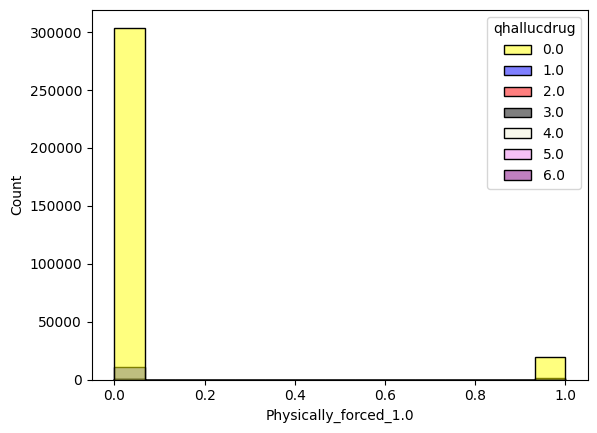

In [54]:
sns.histplot(data=causes_data,x=causes_data['Physically_forced_1.0'],palette=["yellow","blue","red","black","beige", "violet","purple"],hue=causes_data['qhallucdrug'], bins =15)

In [55]:
causes_data['qhallucdrug'].value_counts()

0.0    323426
1.0     12404
2.0       589
3.0       365
4.0       176
6.0       158
5.0        92
Name: qhallucdrug, dtype: int64

In [56]:
hall_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['qhallucdrug'], aggfunc=np.sum)
hall_table

,Physically_forced_1.0
qhallucdrug,
0.0,19521.0
1.0,1132.0
2.0,128.0
3.0,85.0
4.0,47.0
5.0,15.0
6.0,64.0


In [57]:
((128.0+85.0+47.0+15.0+64.0)/(589+365+176+158+92))*100

24.565217391304348

Based on above analysis, cocaine has highest value of 39.77%. If the drug usage is reduced among students by prividing other activities, there may be some chances in reduction of sexual assaults.

Once this activity is happened among students, the impacts are huge and cause serious issues lke emotional imabalance, depresseion etc leading to attempting suicide.

In my next analysis, I will be analyzing their emotional stresses and impacts due to them.

##Possible impacts
Now we have found the possible causes and as a result I am going to analyze the impacts due to this act.

#### Feeling sad or hopeless vs Physically_forced - yes:
1. Yes
2. No

<Axes: xlabel='Physically_forced_1.0', ylabel='Count'>

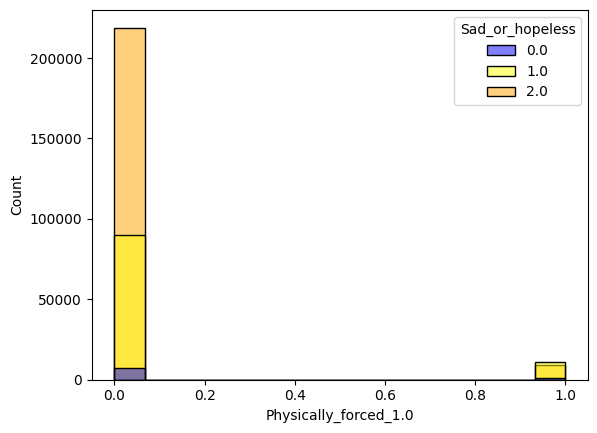

In [58]:
sns.histplot(data=causes_data,x=causes_data['Physically_forced_1.0'],palette=["blue","yellow","orange"],hue=causes_data['Sad_or_hopeless'], bins =15)

In [59]:
causes_data['Sad_or_hopeless'].value_counts()

2.0    227934
1.0    101252
0.0      8024
Name: Sad_or_hopeless, dtype: int64

In [60]:
sad_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['Sad_or_hopeless'], aggfunc=np.sum)
sad_table

,Physically_forced_1.0
Sad_or_hopeless,
0.0,747.0
1.0,11243.0
2.0,9002.0


In [61]:
((11243.0)/(101252))*100

11.103978193023348

####Data comparision with feeling sad or hopless with attempting suicide:

Feeling sad or hopeless
1. Yes
2. No

Attempting suicide
1. 0 times
2. 1 time
3. 2 or 3 times
4. 4 or 5 times
5. 6 or more times

<Axes: xlabel='Attempted_suicide', ylabel='Count'>

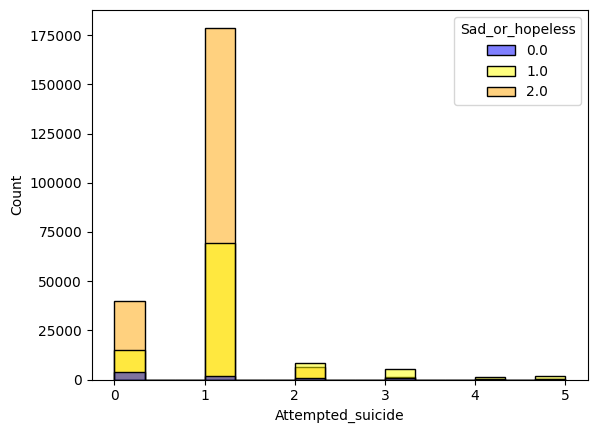

In [62]:
sns.histplot(data=causes_data,x=causes_data['Attempted_suicide'],palette=["blue","yellow","orange"],hue=causes_data['Sad_or_hopeless'], bins =15)

In [63]:
causes_data['Attempted_suicide'].value_counts()

1.0    250064
0.0     58964
2.0     16000
3.0      7589
5.0      2645
4.0      1948
Name: Attempted_suicide, dtype: int64

In [64]:
suicide_12_table=pd.pivot_table(causes_data, values='Sad_or_hopeless', index=['Attempted_suicide'], aggfunc= 'count')
suicide_12_table

,Sad_or_hopeless
Attempted_suicide,
0.0,58964
1.0,250064
2.0,16000
3.0,7589
4.0,1948
5.0,2645


In [65]:
((16000+7589+1948+2645)/(101252))*100

27.83352427606368

####Data comparision with 'Yes' on forced behavior and attempting suicide:

Attempting suicide vs Physically_forced - yes
1. 0 times
2. 1 time
3. 2 or 3 times
4. 4 or 5 times
5. 6 or more times

<Axes: xlabel='Attempted_suicide', ylabel='Count'>

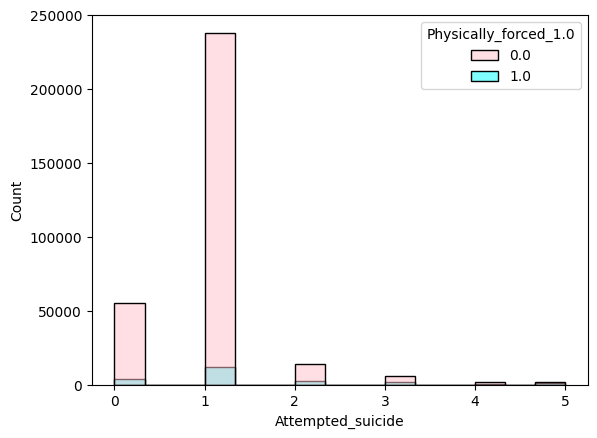

In [66]:
sns.histplot(data=causes_data,x=causes_data['Attempted_suicide'],palette=["pink","cyan"],hue=causes_data['Physically_forced_1.0'], bins =15)

In [67]:
force_sui_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['Attempted_suicide'], aggfunc=np.sum)
force_sui_table

,Physically_forced_1.0
Attempted_suicide,
0.0,3964.0
1.0,11961.0
2.0,2184.0
3.0,1472.0
4.0,435.0
5.0,976.0


In [68]:
((2184.0+1472.0+435.0+976.0)/(20992))*100

24.137766768292682

####Data comparision with 'Yes' on forced behavior and attempting suicide which results in injury or poison:

<Axes: xlabel='Injurious_suicide_attempt_2.0', ylabel='Count'>

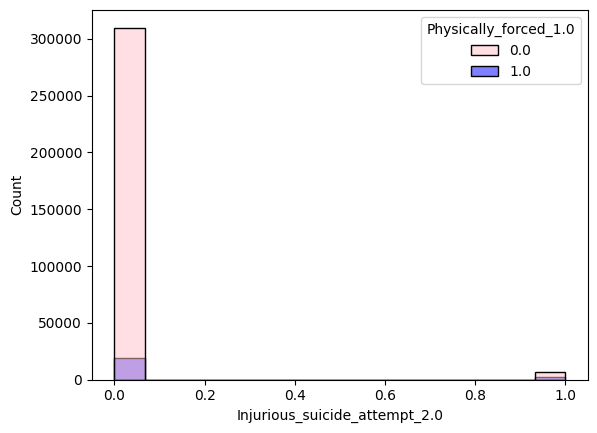

In [69]:
sns.histplot(data=causes_data,x=causes_data['Injurious_suicide_attempt_2.0'],palette=["pink","blue"],hue=causes_data['Physically_forced_1.0'], bins =15)

In [70]:
sui_injury_yes_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['Injurious_suicide_attempt_2.0'], aggfunc=np.sum)
sui_injury_yes_table

,Physically_forced_1.0
Injurious_suicide_attempt_2.0,
0.0,19060.0
1.0,1932.0


In [71]:
((1932.0)/(20992))*100

9.203506097560975

<Axes: xlabel='Injurious_suicide_attempt_3.0', ylabel='Count'>

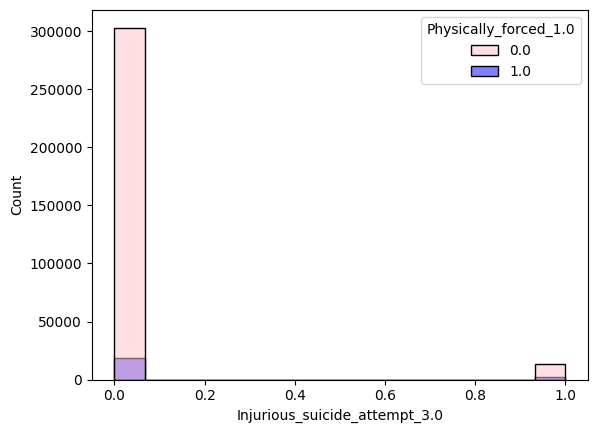

In [72]:
sns.histplot(data=causes_data,x=causes_data['Injurious_suicide_attempt_3.0'],palette=["pink","blue"],hue=causes_data['Physically_forced_1.0'], bins =15)

q29_3.0 - n0 - attempting suicide resulting in injury or poison:


In [73]:
sui_injury_no_table=pd.pivot_table(causes_data, values='Physically_forced_1.0', index=['Injurious_suicide_attempt_3.0'], aggfunc=np.sum)
sui_injury_no_table

,Physically_forced_1.0
Injurious_suicide_attempt_3.0,
0.0,18765.0
1.0,2227.0


In [74]:
((2227.0)/(20992))*100

10.608803353658537

####Data comparision with attempting suicide fro a certain number of times and the same resulted in injury or poison:

1. 0 times
2. 1 time
3. 2 or 3 times
4. 4 or 5 times
5. 6 or more times

<Axes: xlabel='Attempted_suicide', ylabel='Count'>

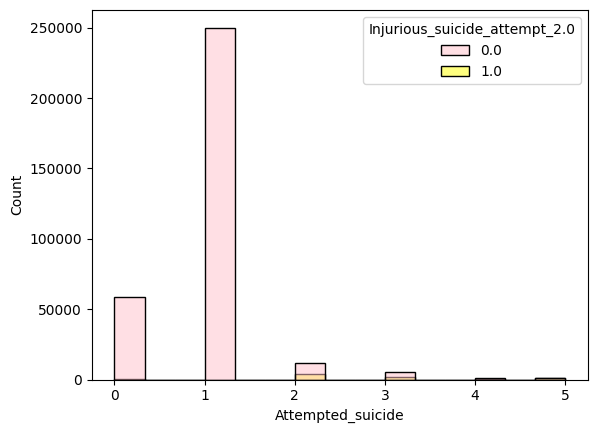

In [75]:
sns.histplot(data=causes_data,x=causes_data['Attempted_suicide'],palette=["pink","yellow"],hue=causes_data['Injurious_suicide_attempt_2.0'], bins =15)

In [76]:
causes_data['Attempted_suicide'].value_counts()

1.0    250064
0.0     58964
2.0     16000
3.0      7589
5.0      2645
4.0      1948
Name: Attempted_suicide, dtype: int64

In [77]:
causes_data['Injurious_suicide_attempt_2.0'].value_counts()

0.0    329036
1.0      8174
Name: Injurious_suicide_attempt_2.0, dtype: int64

In [78]:
twelve_injury_table=pd.pivot_table(causes_data, values='Injurious_suicide_attempt_2.0', index=['Attempted_suicide'], aggfunc=np.sum)
twelve_injury_table

,Injurious_suicide_attempt_2.0
Attempted_suicide,
0.0,203.0
1.0,0.0
2.0,4046.0
3.0,2118.0
4.0,606.0
5.0,1201.0


In [79]:
((4046.0+2118.0+606.0+1201.0)/(8174))*100

97.516515781747

On the above analysis I find that the students who feel sad or hopeless and attempting suicide because of that is of 27.83%. I agree that sexual assault creates huge impact among students but overcoming from that bad part of life is important. To mitigate these activities,

1. Preventive measures should be taken
2. Care should be higher to avoid them being depressed.
3. Schools should teach health beliefs

Finally, I am predicting how my data will behave in future. Once prediction is done, we can take required mitigation measures.

##Accuracy calculation:

In [80]:
# for regressions:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sklm
import scipy as sp

# for KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#for model evaluation and pre-processing tools:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#for modeling with decision trees:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

#for model tuning:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#for plotting confusion matrix:
!pip install scikit-plot
import scikitplot as skplt

# For explaining predictions and visualizing explanations
!pip install shap
import shap

#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 17.2 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [81]:
#dmba stuff
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.0 MB/s eta 0:00:00
Colab environment detected.


In [82]:
# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [83]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [84]:
# Just switching off all warnings -- risky, but it helps to avoid clutter in the notebook.
import warnings
warnings.filterwarnings('ignore')

In [85]:
knn_data = required_year.copy()
knn_data.head()

,sitecode,sitename,year,age,sex,grade,Physically_forced,Sad_or_hopeless,Attempted_suicide,Injurious_suicide_attempt,Source_of_alcohol,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qhallucdrug,qtaughtHIV,qtaughtsexed
167046,CH,"Chicago, IL (CH)",2007,3.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0
167047,CH,"Chicago, IL (CH)",2007,4.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
167048,CH,"Chicago, IL (CH)",2007,4.0,0.0,1.0,2.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
167049,CH,"Chicago, IL (CH)",2007,0.0,2.0,1.0,2.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,0.0,1.0,0.0
167050,CH,"Chicago, IL (CH)",2007,0.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0


###Grid Search

In [86]:
Xvar = knn_data.drop(['Physically_forced','sitecode', 'sitename'], axis=1).astype('float64')
yvar= knn_data.Physically_forced.astype('float64')


In [87]:
# Split the data into training and test portions:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xvar, yvar, test_size=0.25, random_state=7)
print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(252902, 14) (252902,)
(84301, 14) (84301,)


In [88]:
# Select the model approach for fitting: Decision Tree Classifier
DT_insurance = DecisionTreeClassifier(random_state=23)

In [89]:
# set the gridsearch parameters for decision tree
dtc_param_grid={'max_depth':[10,12,18], 'max_leaf_nodes':np.arange(5,15), 'max_features': [5, 9, 18]}

In [90]:
# define the gridsearch for decision tree classification:
dtc_grid_search = GridSearchCV(DT_insurance, dtc_param_grid, cv=5, scoring='accuracy')

In [91]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
dtc_grid_search.fit(X2_train, Y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [10, 12, 18], 'max_features': [5, 9, 18],
                         'max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

In [92]:
dtc_grid_search.cv_results_['mean_test_score']

array([0.70354526, 0.75106565, 0.75962232, 0.75962232, 0.75962232,
       0.77246523, 0.78847539, 0.79161099, 0.79161099, 0.79592887,
       0.78417728, 0.78686211, 0.81026643, 0.81026643, 0.8145685 ,
       0.82044033, 0.82044033, 0.82794917, 0.83175697, 0.83267433,
       0.76705603, 0.78403493, 0.79314518, 0.79901702, 0.80751834,
       0.8084001 , 0.81012409, 0.81404655, 0.81713075, 0.81713075,
       0.70354526, 0.75106565, 0.75962232, 0.75962232, 0.75962232,
       0.77246523, 0.78847539, 0.79161099, 0.79161099, 0.79592887,
       0.78417728, 0.78686211, 0.81026643, 0.81026643, 0.8145685 ,
       0.82044033, 0.82044033, 0.82794917, 0.83175697, 0.83267433,
       0.76705603, 0.78403493, 0.79314518, 0.79901702, 0.80751834,
       0.8084001 , 0.81012409, 0.81404655, 0.81713075, 0.81713075,
       0.70354526, 0.75106565, 0.75962232, 0.75962232, 0.75962232,
       0.77246523, 0.78847539, 0.79161099, 0.79161099, 0.79592887,
       0.78417728, 0.78686211, 0.81026643, 0.81026643, 0.81456

In [93]:
dtc_grid_search.best_params_

{'max_depth': 10, 'max_features': 9, 'max_leaf_nodes': 14}

In [94]:
dtc_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=9, max_leaf_nodes=14,
                       random_state=23)

In [95]:
#get the names of the independent variables for using them in the tree plot
independent_var=knn_data.drop(['Physically_forced', 'grade', 'year'], axis=1).columns

In [96]:
print(independent_var)

Index(['sitecode', 'sitename', 'age', 'sex', 'Sad_or_hopeless',
       'Attempted_suicide', 'Injurious_suicide_attempt', 'Source_of_alcohol',
       'qalcoholschool', 'qmarijuanaschool', 'qcurrentcocaine', 'qhallucdrug',
       'qtaughtHIV', 'qtaughtsexed'],
      dtype='object')


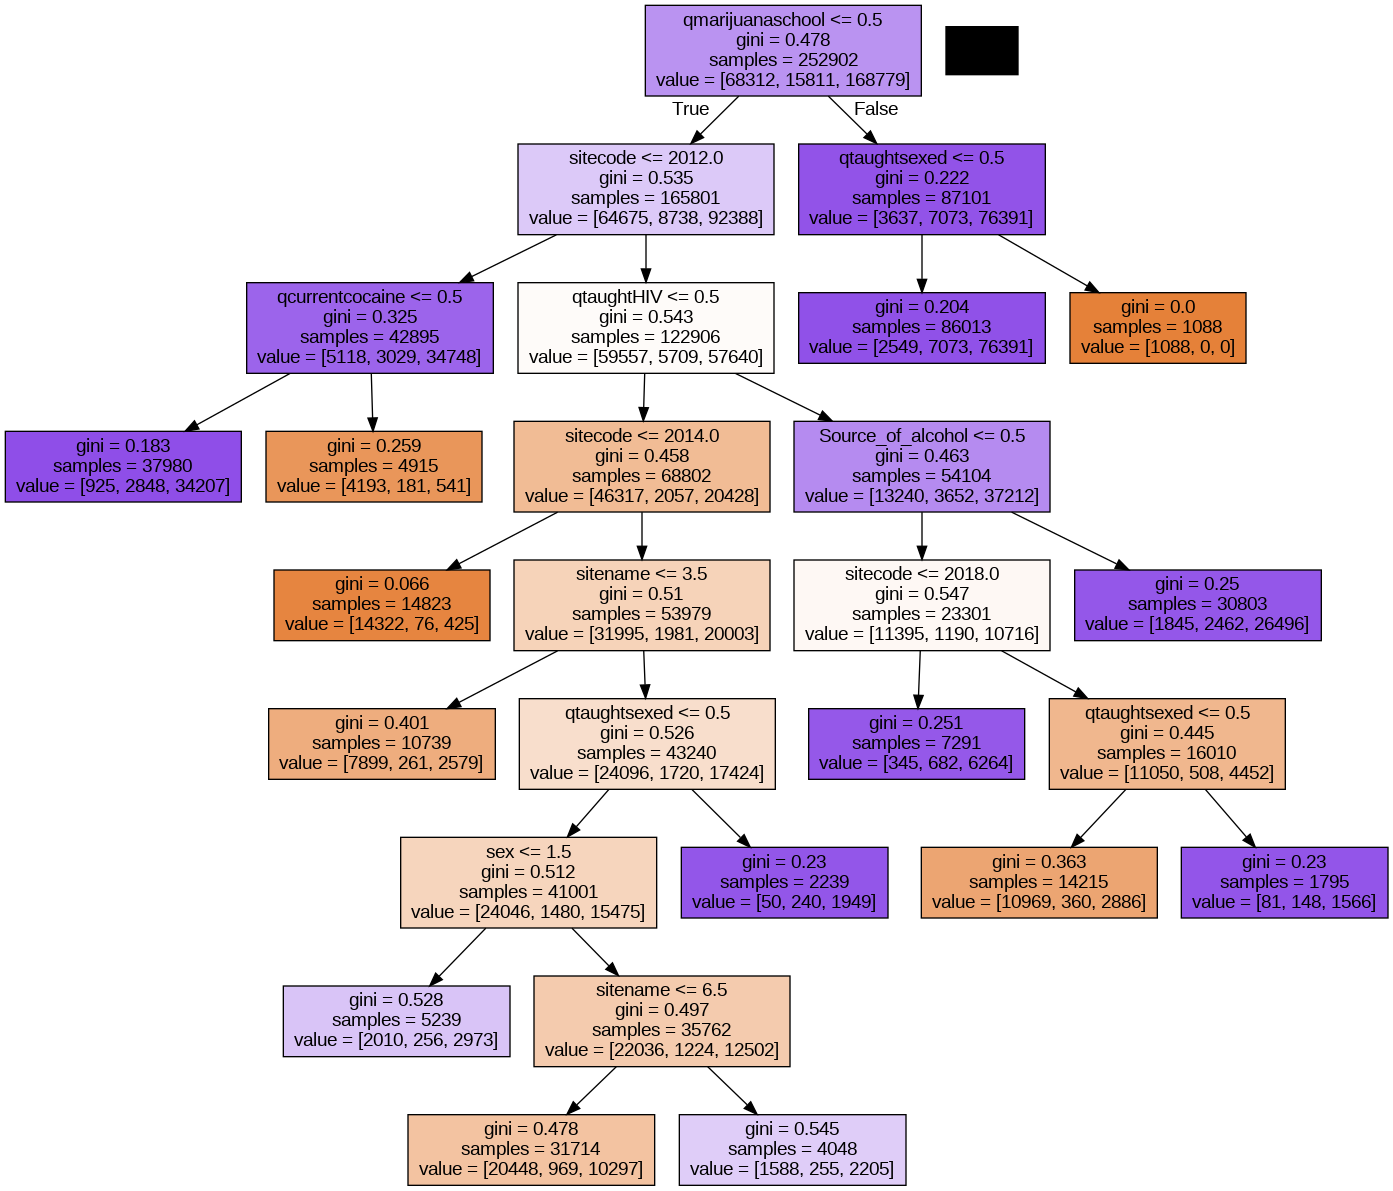

In [97]:
DTcgraph = print_tree(dtc_grid_search.best_estimator_, features=independent_var)
Image(DTcgraph.create_png())

In [98]:
  # Get the predictions of the best decision tree classifier
DT_prediction_ctc=dtc_grid_search.best_estimator_.predict(X2_test)

In [99]:
np.sqrt(np.square(DT_prediction_ctc-Y2_test).mean()) #RMSE calculation

0.6918310102446265

In [100]:
# Evaluate how good the decision tree classification is:
cm_DTC = confusion_matrix(Y2_test, DT_prediction_ctc)
print("Confusion Matrix:\n", cm_DTC)
print("\n")
print("Classification Report:\n",classification_report(Y2_test, DT_prediction_ctc))

Confusion Matrix:
 [[19715     0  3128]
 [  604     0  4577]
 [ 5664     0 50613]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.86      0.81     22843
         1.0       0.00      0.00      0.00      5181
         2.0       0.87      0.90      0.88     56277

    accuracy                           0.83     84301
   macro avg       0.54      0.59      0.56     84301
weighted avg       0.78      0.83      0.81     84301



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

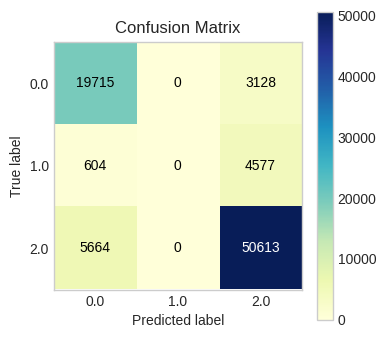

In [101]:
skplt.metrics.plot_confusion_matrix(Y2_test, DT_prediction_ctc, figsize=(4,4), cmap="YlGnBu")

Initially I got 63% as I changed my parameter value and with multiple attempts I got 83% as accuracy.

Overall, some mitigation measures should be taken along with steps to reduce post traumatic stress which is more prevalent among students by saving them from being emotionally attacked.

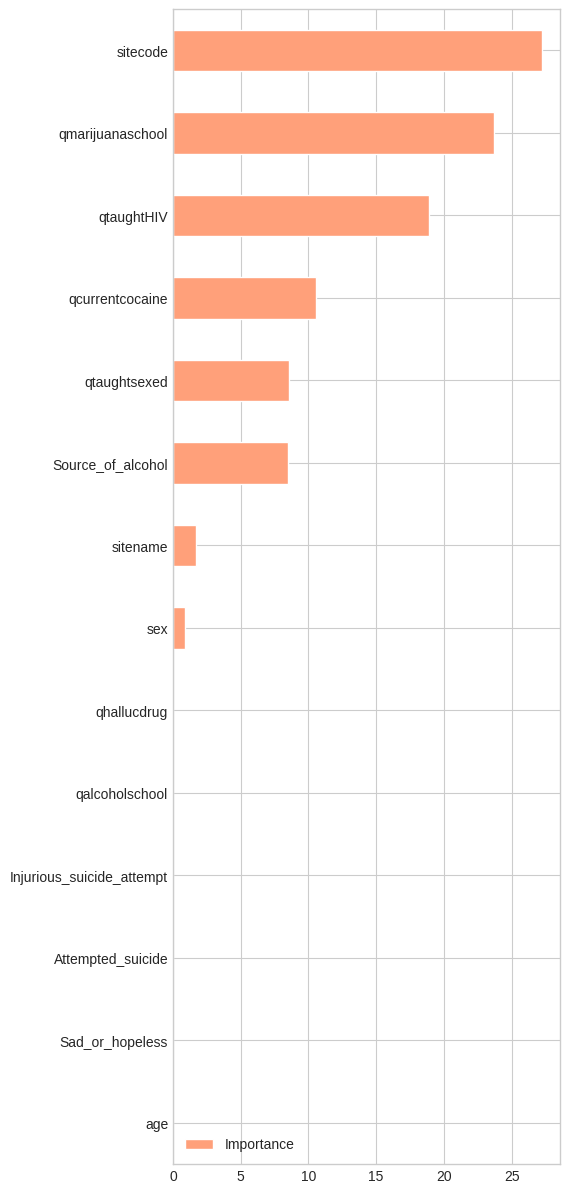

In [102]:
%matplotlib inline
Importance = pd.DataFrame({'Importance':dtc_grid_search.best_estimator_.feature_importances_*100}, \
                          index=independent_var)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsalmon', )
plt.gcf().set_size_inches(5, 15)
plt.show()

In [103]:
explainer2 = shap.TreeExplainer(dtc_grid_search.best_estimator_)
shap_values2=explainer2.shap_values(X2_test)
expected_value2 = explainer2.expected_value

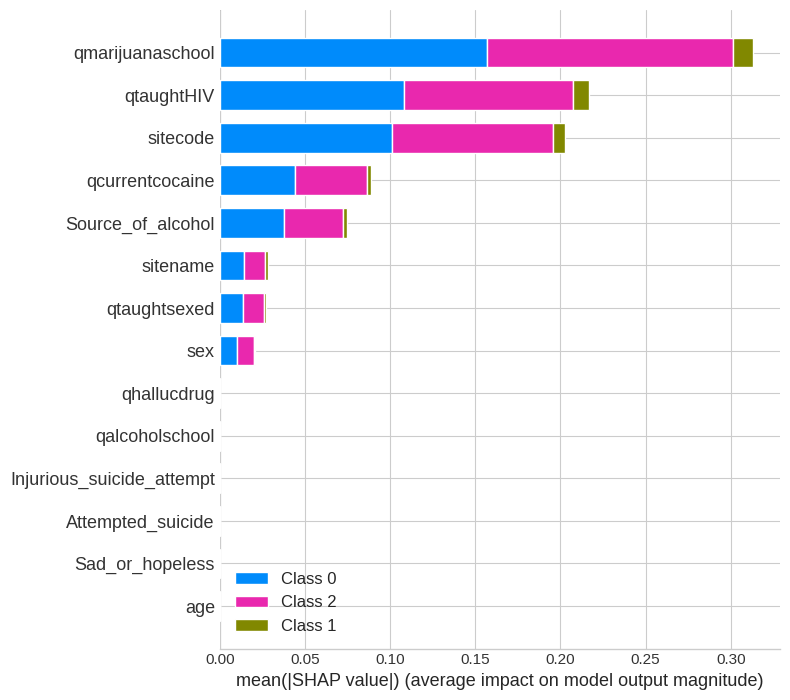

In [104]:
shap.summary_plot(shap_values2, X2_test, plot_type="bar", feature_names = independent_var, max_display=100)